In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('Base de datos v1.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               20000 non-null  int64  
 1   Edad                     19700 non-null  float64
 2   Genero                   20000 non-null  object 
 3   Estado_Civil             20000 non-null  object 
 4   Ingreso_Mensual          19500 non-null  float64
 5   Transacciones_Mensuales  20000 non-null  int64  
 6   Monto_Promedio_Compra    19800 non-null  float64
 7   Uso_Linea_Credito_Pct    20000 non-null  float64
 8   Pagos_Atrasados          20000 non-null  int64  
 9   Antiguedad_Meses         20000 non-null  int64  
 10  Productos_Adicionales    20000 non-null  int64  
 11  Fuga                     20000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1.8+ MB


In [4]:
data.describe()

,ID_Cliente,Edad,Ingreso_Mensual,Transacciones_Mensuales,Monto_Promedio_Compra,Uso_Linea_Credito_Pct,Pagos_Atrasados,Antiguedad_Meses,Productos_Adicionales,Fuga
count,20000.000000,19700.000000,19500.000000,20000.000000,19800.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,10000.500000,40.187360,4006.623795,31.496050,519.013752,0.285052,0.802350,35.80920,1.088500,0.185350
std,5773.647028,11.628559,2848.305669,31.443938,413.345305,0.159271,0.894217,35.80716,1.204259,0.388591
min,1.000000,18.000000,200.000000,12.000000,23.540000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,5000.750000,32.000000,1916.000000,26.000000,252.875000,0.160000,0.000000,10.00000,0.000000,0.000000
50%,10000.500000,40.000000,3351.000000,30.000000,406.355000,0.260000,1.000000,25.00000,1.000000,0.000000
75%,15000.250000,48.000000,5373.000000,34.000000,647.460000,0.390000,1.000000,50.00000,2.000000,0.000000
max,20000.000000,75.000000,28733.000000,967.000000,6635.400000,0.900000,6.000000,240.00000,8.000000,1.000000


In [5]:
data.isnull().sum()/len(data)*100

ID_Cliente                 0.0
Edad                       1.5
Genero                     0.0
Estado_Civil               0.0
Ingreso_Mensual            2.5
Transacciones_Mensuales    0.0
Monto_Promedio_Compra      1.0
Uso_Linea_Credito_Pct      0.0
Pagos_Atrasados            0.0
Antiguedad_Meses           0.0
Productos_Adicionales      0.0
Fuga                       0.0
dtype: float64

In [6]:
data.dropna(subset=['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra'], inplace=True)

In [7]:
data.isnull().sum()/len(data)*100

ID_Cliente                 0.0
Edad                       0.0
Genero                     0.0
Estado_Civil               0.0
Ingreso_Mensual            0.0
Transacciones_Mensuales    0.0
Monto_Promedio_Compra      0.0
Uso_Linea_Credito_Pct      0.0
Pagos_Atrasados            0.0
Antiguedad_Meses           0.0
Productos_Adicionales      0.0
Fuga                       0.0
dtype: float64

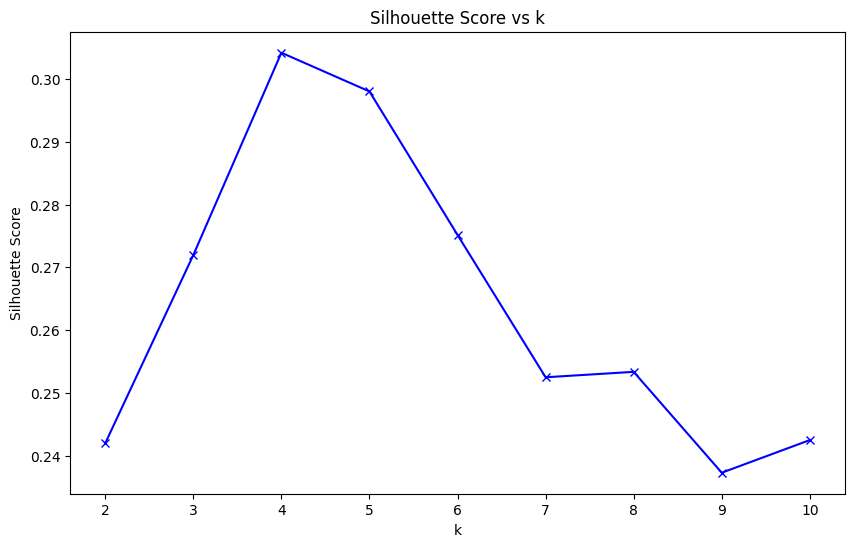

Optimal number of clusters: 4


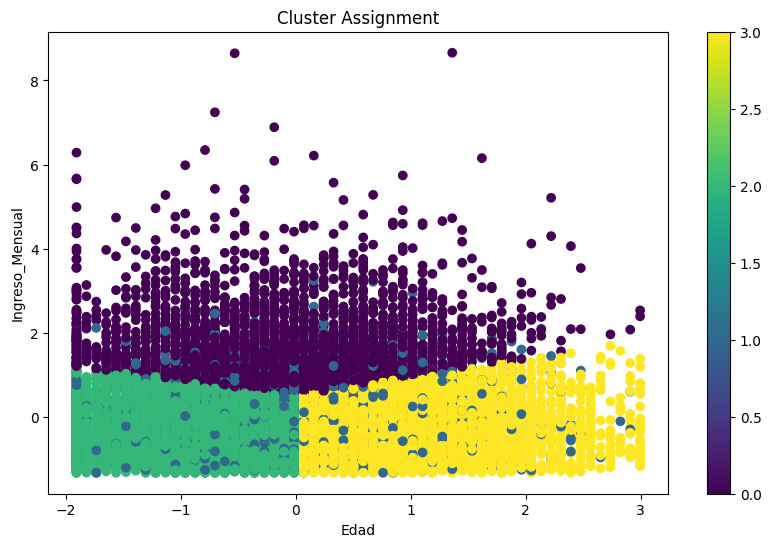


Cluster Characteristics:
              Edad  Ingreso_Mensual  Monto_Promedio_Compra
Cluster                                                   
0        39.313942      8835.813152             442.892077
1        39.975350      3714.892437            1469.604728
2        30.617849      2914.952441             413.273466
3        50.485400      3018.032813             417.329967


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Prepare the data
features = ['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra']
X = data[features]

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Find optimal number of clusters using silhouette score
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# 4. Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

# 5. Get optimal k and train final model
optimal_k = K[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(X_scaled)

# 6. Add cluster labels to original dataframe
data['Cluster'] = final_kmeans.labels_

# 7. Visualize clusters (using first two features)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=final_kmeans.labels_, cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Cluster Assignment')
plt.colorbar(scatter)
plt.show()

# 8. Analyze cluster characteristics
print("\nCluster Characteristics:")
print(data.groupby('Cluster')[features].mean())


RESULTADOS DEL CLUSTERING (K=4)

Distribución de clientes por cluster:
Cluster
Cluster
0    3163
1    1785
2    7149
3    6918
Name: count, dtype: int64


Características promedio por cluster:
          Edad  Ingreso_Mensual  Monto_Promedio_Compra
Cluster                                               
0        39.31          8835.81                 442.89
1        39.98          3714.89                1469.60
2        30.62          2914.95                 413.27
3        50.49          3018.03                 417.33


Distribución de Género por cluster:
Genero      F     M
Cluster            
0        0.50  0.50
1        0.51  0.49
2        0.50  0.50
3        0.50  0.50


Perfiles de clientes por cluster (primeras filas):
    Edad  Ingreso_Mensual  Monto_Promedio_Compra  Cluster
0   33.0           1243.0                 497.77        2
1   23.0           6629.0                 362.93        2
2   34.0           2051.0                 297.97        2
3   43.0           9674.0        

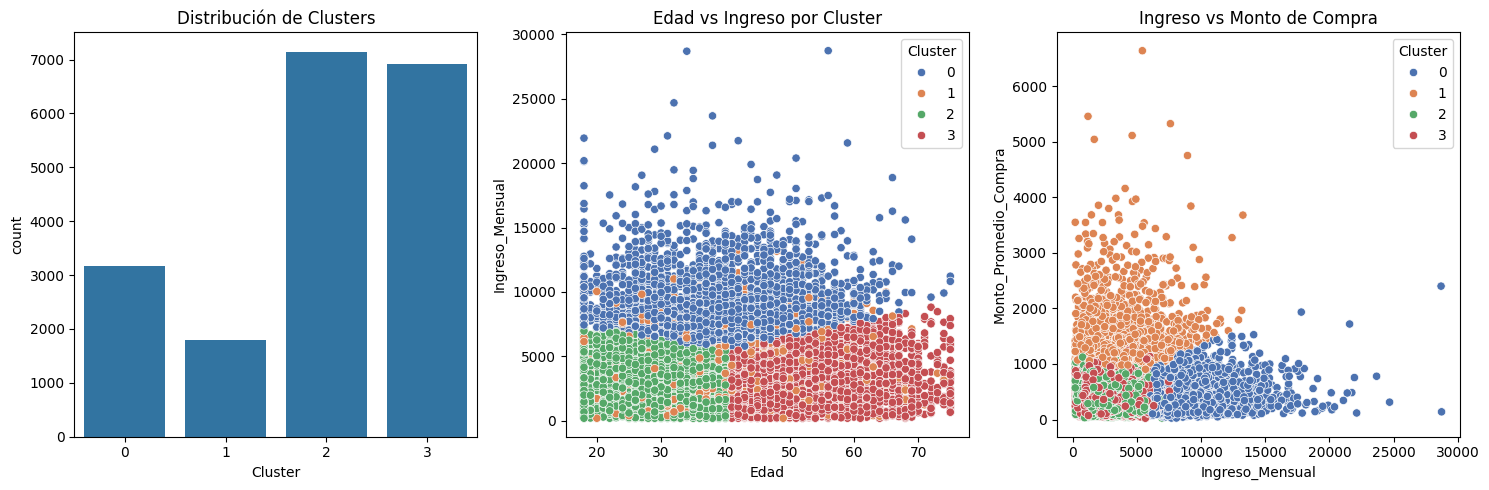

In [9]:
# ===================================
# 🧠 RESULTADOS DEL CLUSTERING
# ===================================

print("\n" + "="*60)
print(f"RESULTADOS DEL CLUSTERING (K={optimal_k})")
print("="*60 + "\n")

# 1️⃣ Distribución por cluster
print("Distribución de clientes por cluster:")
cluster_dist = data['Cluster'].value_counts().sort_index()
print("Cluster")
print(cluster_dist)
print("\n")

# 2️⃣ Características promedio por cluster
print("Características promedio por cluster:")
caracteristicas = ['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra']
cluster_stats = data.groupby('Cluster')[caracteristicas].mean().round(2)
print(cluster_stats)
print("\n")

# 3️⃣ Distribución de género por cluster (si existe la columna)
if 'Genero' in data.columns:
    print("Distribución de Género por cluster:")
    gender_dist = pd.crosstab(data['Cluster'], data['Genero'], normalize='index').round(2)
    print(gender_dist)
    print("\n")

# 4️⃣ Análisis de frecuencia de compra por cluster
if 'Frecuencia_Compra' in data.columns:
    print("Frecuencia de compra promedio por cluster:")
    freq_stats = data.groupby('Cluster')['Frecuencia_Compra'].agg(['mean', 'count']).round(2)
    print(freq_stats)
    print("\n")

# 5️⃣ Mostrar perfiles de los primeros clientes
print("Perfiles de clientes por cluster (primeras filas):")
display_cols = ['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra', 'Cluster']
print(data[display_cols].head(10))
print("\n")

# ===================================
# 🧩 Interpretación de cada cluster
# ===================================

print("📊 INTERPRETACIÓN DE CLUSTERS")
print("="*60)

for c in cluster_stats.index:
    avg_age = cluster_stats.loc[c, 'Edad']
    avg_income = cluster_stats.loc[c, 'Ingreso_Mensual']
    avg_purchase = cluster_stats.loc[c, 'Monto_Promedio_Compra']
    cluster_size = cluster_dist[c]
    
    desc = f"""
🧩 Cluster {c}:
- Tamaño del cluster: {cluster_size} clientes
- Edad promedio: {avg_age:.1f} años
- Ingreso mensual promedio: ${avg_income:,.2f}
- Monto promedio de compra: ${avg_purchase:,.2f}
"""
    if 'Genero' in data.columns:
        gender_majority = gender_dist.loc[c].idxmax()
        gender_percent = gender_dist.loc[c, gender_majority] * 100
        desc += f"- {gender_percent:.1f}% {gender_majority}\n"
        
    print(desc)

# Visualizaciones adicionales
plt.figure(figsize=(15, 5))

# 1. Distribución de clusters
plt.subplot(131)
sns.countplot(data=data, x='Cluster')
plt.title('Distribución de Clusters')

# 2. Edad vs Ingreso por cluster
plt.subplot(132)
sns.scatterplot(data=data, x='Edad', y='Ingreso_Mensual', hue='Cluster', palette='deep')
plt.title('Edad vs Ingreso por Cluster')

# 3. Ingreso vs Monto de compra
plt.subplot(133)
sns.scatterplot(data=data, x='Ingreso_Mensual', y='Monto_Promedio_Compra', 
                hue='Cluster', palette='deep')
plt.title('Ingreso vs Monto de Compra')

plt.tight_layout()
plt.show()

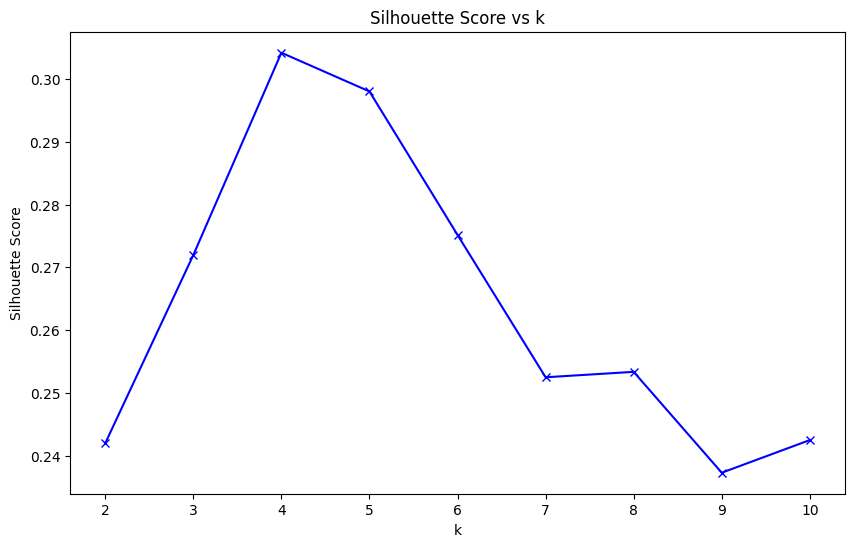

Optimal number of clusters: 4


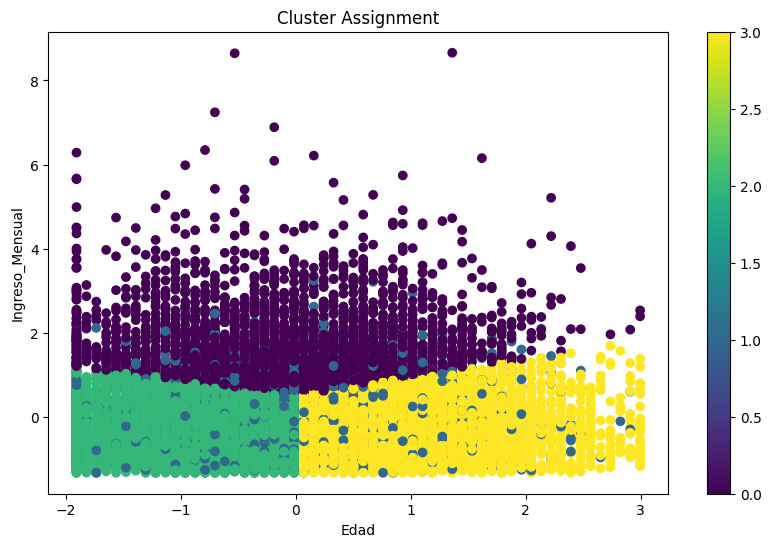

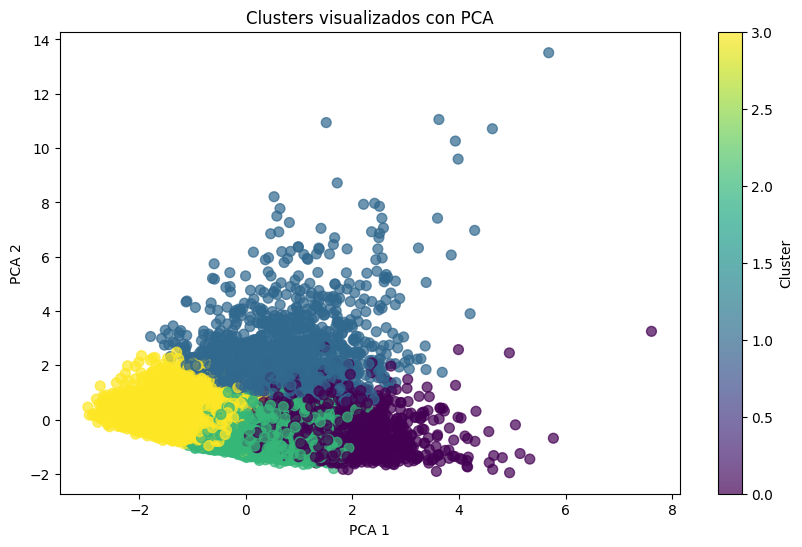

Varianza explicada por PCA 1: 0.34
Varianza explicada por PCA 2: 0.33


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Prepare the data
features = ['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra']
X = data[features]

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Find optimal number of clusters using silhouette score
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# 4. Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

# 5. Get optimal k and train final model
optimal_k = K[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(X_scaled)

# 6. Add cluster labels to original dataframe
data['Cluster'] = final_kmeans.labels_

# 7. Visualize clusters (using first two features)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=final_kmeans.labels_, cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Cluster Assignment')
plt.colorbar(scatter)
plt.show()

from sklearn.decomposition import PCA

# 9. Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 10. Visualizar los clusters proyectados con PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.7, s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters visualizados con PCA')
plt.colorbar(scatter, label='Cluster')
plt.show()

# 11. Mostrar la varianza explicada por cada componente
print(f"Varianza explicada por PCA 1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Varianza explicada por PCA 2: {pca.explained_variance_ratio_[1]:.2f}")



COMPOSICIÓN DE LOS CLUSTERS

Distribución absoluta y porcentual:
         Número de Clientes  Porcentaje
Cluster                                
0                      3163       16.63
1                      1785        9.39
2                      7149       37.60
3                      6918       36.38


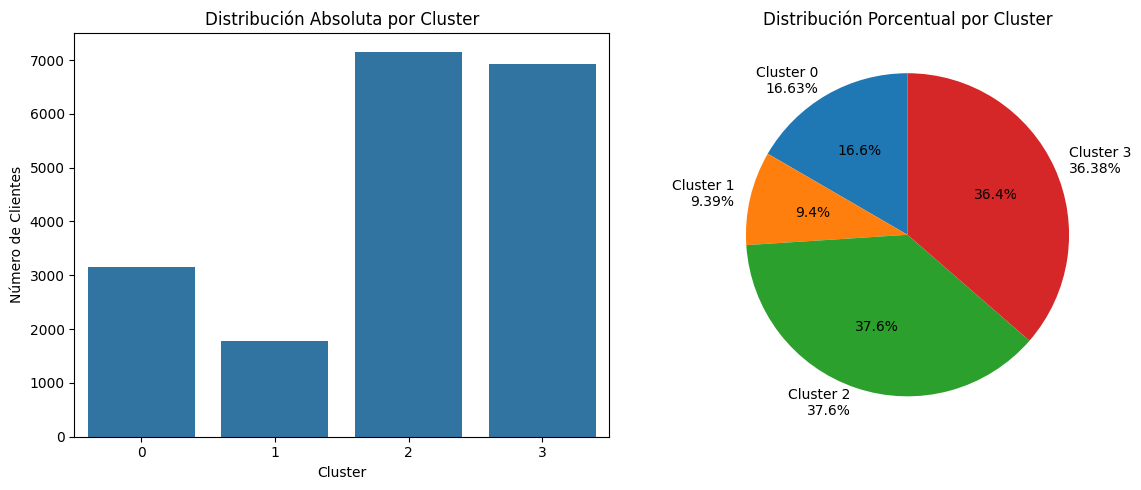

In [11]:
# ===================================
# 📊 ANÁLISIS DE COMPONENTES POR CLUSTER
# ===================================

# Obtener el tamaño de cada cluster
cluster_sizes = data['Cluster'].value_counts().sort_index()

# Calcular porcentajes
cluster_percentages = (cluster_sizes / len(data) * 100).round(2)

# Crear un DataFrame con la información
cluster_composition = pd.DataFrame({
    'Número de Clientes': cluster_sizes,
    'Porcentaje': cluster_percentages
})

print("\nCOMPOSICIÓN DE LOS CLUSTERS")
print("="*50)
print("\nDistribución absoluta y porcentual:")
print(cluster_composition)

# Visualizar la distribución
plt.figure(figsize=(12, 5))

# Gráfico de barras
plt.subplot(1, 2, 1)
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values)
plt.title('Distribución Absoluta por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')

# Gráfico de pie
plt.subplot(1, 2, 2)
plt.pie(cluster_sizes.values, labels=[f'Cluster {i}\n{p}%' 
                                    for i, p in zip(cluster_sizes.index, cluster_percentages)],
        autopct='%1.1f%%', startangle=90)
plt.title('Distribución Porcentual por Cluster')

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
path = "Base de datos v1.xlsx"
sheet = "fuga_clientes_credito_realista"
df = pd.read_excel(path, sheet_name=sheet)

In [14]:
df.head()

,ID_Cliente,Edad,Genero,Estado_Civil,Ingreso_Mensual,Transacciones_Mensuales,Monto_Promedio_Compra,Uso_Linea_Credito_Pct,Pagos_Atrasados,Antiguedad_Meses,Productos_Adicionales,Fuga
0,1,33.0,F,Soltero,1243.0,32,497.77,0.25,1,1,1,1
1,2,23.0,F,Casado,6629.0,36,362.93,0.22,2,3,0,0
2,3,34.0,M,Divorciado,2051.0,27,297.97,0.11,1,42,3,0
3,4,43.0,F,Divorciado,9674.0,32,585.10,0.72,1,10,2,1
4,5,30.0,F,Divorciado,200.0,26,242.93,0.45,0,1,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               20000 non-null  int64  
 1   Edad                     19700 non-null  float64
 2   Genero                   20000 non-null  object 
 3   Estado_Civil             20000 non-null  object 
 4   Ingreso_Mensual          19500 non-null  float64
 5   Transacciones_Mensuales  20000 non-null  int64  
 6   Monto_Promedio_Compra    19800 non-null  float64
 7   Uso_Linea_Credito_Pct    20000 non-null  float64
 8   Pagos_Atrasados          20000 non-null  int64  
 9   Antiguedad_Meses         20000 non-null  int64  
 10  Productos_Adicionales    20000 non-null  int64  
 11  Fuga                     20000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1.8+ MB


In [16]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

In [17]:
num_cols

['ID_Cliente',
 'Edad',
 'Ingreso_Mensual',
 'Transacciones_Mensuales',
 'Monto_Promedio_Compra',
 'Uso_Linea_Credito_Pct',
 'Pagos_Atrasados',
 'Antiguedad_Meses',
 'Productos_Adicionales',
 'Fuga']

In [18]:
cat_cols

['Genero', 'Estado_Civil']

In [19]:
nulos_por_col = df.isna().sum().sort_values(ascending=False).rename("nulos").to_frame()
nulos_por_col["%nulos"] = (100*nulos_por_col["nulos"]/len(df)).round(2)
nulos_por_col

,nulos,%nulos
Ingreso_Mensual,500,2.5
Edad,300,1.5
Monto_Promedio_Compra,200,1.0
ID_Cliente,0,0.0
Genero,0,0.0
Estado_Civil,0,0.0
Transacciones_Mensuales,0,0.0
Uso_Linea_Credito_Pct,0,0.0
Pagos_Atrasados,0,0.0
Antiguedad_Meses,0,0.0


In [20]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df_num = pd.DataFrame(num_imputer.fit_transform(df[num_cols]), columns=num_cols, index=df.index) if num_cols else pd.DataFrame(index=df.index)
df_cat = pd.DataFrame(cat_imputer.fit_transform(df[cat_cols]), columns=cat_cols, index=df.index) if cat_cols else pd.DataFrame(index=df.index)

df_imputed = pd.concat([df_num, df_cat], axis=1)

In [21]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               20000 non-null  float64
 1   Edad                     20000 non-null  float64
 2   Ingreso_Mensual          20000 non-null  float64
 3   Transacciones_Mensuales  20000 non-null  float64
 4   Monto_Promedio_Compra    20000 non-null  float64
 5   Uso_Linea_Credito_Pct    20000 non-null  float64
 6   Pagos_Atrasados          20000 non-null  float64
 7   Antiguedad_Meses         20000 non-null  float64
 8   Productos_Adicionales    20000 non-null  float64
 9   Fuga                     20000 non-null  float64
 10  Genero                   20000 non-null  object 
 11  Estado_Civil             20000 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.8+ MB


In [22]:
low_cardinality = [c for c in cat_cols if df_imputed[c].nunique() <= 20]
high_cardinality = [c for c in cat_cols if c not in low_cardinality]

df_encoded = pd.get_dummies(df_imputed, columns=low_cardinality, drop_first=False)

In [23]:
df_encoded.head()

,ID_Cliente,Edad,Ingreso_Mensual,Transacciones_Mensuales,Monto_Promedio_Compra,Uso_Linea_Credito_Pct,Pagos_Atrasados,Antiguedad_Meses,Productos_Adicionales,Fuga,Genero_F,Genero_M,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,Estado_Civil_Viudo
0,1.0,33.0,1243.0,32.0,497.77,0.25,1.0,1.0,1.0,1.0,True,False,False,False,True,False
1,2.0,23.0,6629.0,36.0,362.93,0.22,2.0,3.0,0.0,0.0,True,False,True,False,False,False
2,3.0,34.0,2051.0,27.0,297.97,0.11,1.0,42.0,3.0,0.0,False,True,False,True,False,False
3,4.0,43.0,9674.0,32.0,585.10,0.72,1.0,10.0,2.0,1.0,True,False,False,True,False,False
4,5.0,30.0,200.0,26.0,242.93,0.45,0.0,1.0,0.0,0.0,True,False,False,True,False,False


In [24]:
#matriz de features para DBSCAN
features_for_dbscan = num_cols + [c for c in df_encoded.columns if c not in df_imputed.columns]  # num + dummies
X = df_encoded[features_for_dbscan].copy()

In [25]:
X.head()

,ID_Cliente,Edad,Ingreso_Mensual,Transacciones_Mensuales,Monto_Promedio_Compra,Uso_Linea_Credito_Pct,Pagos_Atrasados,Antiguedad_Meses,Productos_Adicionales,Fuga,Genero_F,Genero_M,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,Estado_Civil_Viudo
0,1.0,33.0,1243.0,32.0,497.77,0.25,1.0,1.0,1.0,1.0,True,False,False,False,True,False
1,2.0,23.0,6629.0,36.0,362.93,0.22,2.0,3.0,0.0,0.0,True,False,True,False,False,False
2,3.0,34.0,2051.0,27.0,297.97,0.11,1.0,42.0,3.0,0.0,False,True,False,True,False,False
3,4.0,43.0,9674.0,32.0,585.10,0.72,1.0,10.0,2.0,1.0,True,False,False,True,False,False
4,5.0,30.0,200.0,26.0,242.93,0.45,0.0,1.0,0.0,0.0,True,False,False,True,False,False


In [26]:
#escalado
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_scaled.drop(columns=["Fuga"], inplace=True)

In [27]:
X_scaled.head()

,ID_Cliente,Edad,Ingreso_Mensual,Transacciones_Mensuales,Monto_Promedio_Compra,Uso_Linea_Credito_Pct,Pagos_Atrasados,Antiguedad_Meses,Productos_Adicionales,Genero_F,Genero_M,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,Estado_Civil_Viudo
0,-1.0000,-0.4375,-0.628644,0.250,0.234899,-0.043478,0.0,-0.600,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.9999,-1.0625,0.977559,0.750,-0.111584,-0.173913,1.0,-0.550,-0.5,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.9998,-0.3750,-0.387684,-0.375,-0.278505,-0.652174,0.0,0.425,1.0,-1.0,1.0,0.0,1.0,0.0,0.0
3,-0.9997,0.1875,1.885633,0.250,0.459301,2.000000,0.0,-0.375,0.5,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.9996,-0.6250,-0.939685,-0.500,-0.419935,0.826087,-1.0,-0.600,-0.5,0.0,0.0,0.0,1.0,0.0,0.0


## Método 1

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

#parametros iniciales
eps_values = np.arange(0.3, 2.0, 0.1)   # rango de vecindad
min_samples_values = [3, 5, 10]          # puntos mínimos por núcleo

resultados = []

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1: 
            sil = silhouette_score(X_scaled, labels)
        else:
            sil = -1

        resultados.append({
            "eps": eps,
            "min_samples": min_s,
            "n_clusters": n_clusters,
            "n_noise": n_noise,
            "silhouette": sil
        })

res_df = pd.DataFrame(resultados)
res_df.sort_values(by="silhouette", ascending=False).head(10)


In [ ]:
best_params = res_df.sort_values(by="silhouette", ascending=False).iloc[0]
best_params

,45
eps,1.800000
min_samples,3.000000
n_clusters,4.000000
n_noise,532.000000
silhouette,0.353533


In [ ]:
db_best = DBSCAN(eps=best_params.eps, min_samples=int(best_params.min_samples))
labels_dbscan = db_best.fit_predict(X_scaled)

df_imputed["Cluster_DBSCAN"] = labels_dbscan

In [ ]:
print(df_imputed["Cluster_DBSCAN"].value_counts().sort_index())

n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)
print(f"Clusters encontrados: {n_clusters}")
print(f"Puntos de ruido: {n_noise}")

if n_clusters > 1:
    print("Silhouette:", silhouette_score(X_scaled, labels_dbscan))


Cluster_DBSCAN
-1      532
 0    19450
 1        3
 2       11
 3        4
Name: count, dtype: int64
Clusters encontrados: 4
Puntos de ruido: 532
Silhouette: 0.3535331292686497


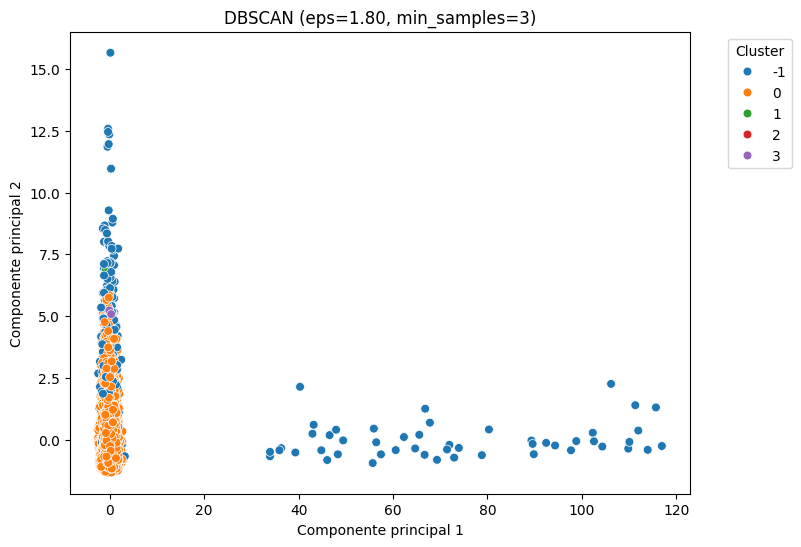

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_dbscan, palette="tab10", s=40)
plt.title(f"DBSCAN (eps={best_params.eps:.2f}, min_samples={int(best_params.min_samples)})")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
df_summary = df_imputed.groupby("Cluster_DBSCAN")[num_cols].mean().round(2)
df_summary

,ID_Cliente,Edad,Ingreso_Mensual,Transacciones_Mensuales,Monto_Promedio_Compra,Uso_Linea_Credito_Pct,Pagos_Atrasados,Antiguedad_Meses,Productos_Adicionales,Fuga
Cluster_DBSCAN,,,,,,,,,,
-1,10286.28,41.04,6089.34,85.51,1266.15,0.32,1.36,89.26,2.35,0.19
0,9992.21,40.16,3934.21,30.02,496.64,0.28,0.79,34.22,1.05,0.19
1,4922.67,40.67,1756.00,25.33,2933.77,0.30,1.33,78.33,1.00,0.00
2,10128.55,51.45,3106.36,29.27,507.64,0.24,0.36,232.82,4.73,0.09
3,15745.25,29.75,1322.50,31.50,2506.19,0.51,1.00,57.75,1.00,0.00


# Método 2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from collections import deque

eps = 1.8           # radio de vecindad en el espacio escalado
min_samples = 4     # mínimo de puntos en la vecindad

X_arr = X_scaled.values if hasattr(X_scaled, "values") else np.asarray(X_scaled)
n = X_arr.shape[0]

nbrs = NearestNeighbors(radius=eps, metric='euclidean', algorithm='auto')
nbrs.fit(X_arr)

neighbors = {i: nbrs.radius_neighbors(X_arr[i:i+1], return_distance=False)[0].tolist() for i in range(n)}

rows = [{"Punto": f"P{i}", "Vecinos_eps": [f"P{v}" for v in vec], "Cuenta": len(vec)} for i, vec in neighbors.items()]
tabla_vecinos = pd.DataFrame(rows)
display(tabla_vecinos.head(10))

,Punto,Vecinos_eps,Cuenta
0,P0,"[P2187, P153, P2990, P262, P1576, P1523, P2301...",323
1,P1,"[P56, P799, P7395, P3273, P458, P4532, P1438, ...",35
2,P2,"[P185, P1586, P7548, P5766, P2107, P3516, P109...",126
3,P3,"[P2215, P1004, P186, P11612, P3, P8332, P422]",7
4,P4,"[P1593, P667, P3800, P579, P1972, P3979, P5589...",118
5,P5,"[P2930, P1630, P4500, P4466, P426, P2288, P194...",233
6,P6,"[P5302, P3174, P16, P627, P2139, P2428, P4161,...",203
7,P7,"[P4770, P3686, P2783, P1848, P3387, P62, P7147...",136
8,P8,"[P241, P36, P2610, P5029, P595, P4792, P1064, ...",141
9,P9,"[P795, P2050, P8997, P4873, P1741, P1398, P372...",46


In [ ]:
core = set([i for i, vec in neighbors.items() if len(vec) >= min_samples])
border, noise = set(), set()

for i in range(n):
    if i in core:
        continue
    if any(nb in core for nb in neighbors[i]):
        border.add(i)
    else:
        noise.add(i)

res_roles = pd.DataFrame({
    "núcleos": [sorted(list(core))],
    "bordes": [sorted(list(border))],
    "ruido": [sorted(list(noise))]
})
display(res_roles)

,núcleos,bordes,ruido
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[10, 18, 65, 72, 74, 152, 154, 164, 197, 218, ...","[49, 82, 129, 130, 142, 181, 195, 222, 242, 31..."


In [ ]:
visited = [False]*n
labels = [-1]*n
cluster_id = 0
log = []

for i in range(n):
    if visited[i]:
        continue
    visited[i] = True
    N = neighbors[i]
    if len(N) < min_samples:
        labels[i] = -1
        log.append((f"P{i}", "ruido provisional", N))
    else:
        cluster_id += 1
        labels[i] = cluster_id
        queue = deque(N)
        log.append((f"P{i}", f"núcleo -> inicia C{cluster_id}", N))
        while queue:
            q = queue.popleft()
            if not visited[q]:
                visited[q] = True
                Nq = neighbors[q]
                if len(Nq) >= min_samples:
                    for v in Nq:
                        if (not visited[v]) and (v not in queue):
                            queue.append(v)
                log.append((f"P{q}", "visitado", Nq))
            if labels[q] == -1 or labels[q] == 0:
                labels[q] = cluster_id

df_log = pd.DataFrame(log, columns=["Punto", "Evento", "Vecindad"])
display(df_log.head(15))

,Punto,Evento,Vecindad
0,P0,núcleo -> inicia C1,"[2187, 153, 2990, 262, 1576, 1523, 2301, 352, ..."
1,P2187,visitado,"[15, 2187, 263, 153, 667, 2428, 1363, 1172, 86..."
2,P153,visitado,"[15, 2187, 263, 153, 667, 2428, 1363, 1172, 29..."
3,P2990,visitado,"[16, 2610, 2187, 1593, 5029, 153, 4694, 595, 3..."
4,P262,visitado,"[15, 2187, 263, 153, 667, 1172, 2990, 262, 157..."
5,P1576,visitado,"[15, 2187, 263, 153, 667, 1363, 1172, 2990, 26..."
6,P1523,visitado,"[15, 263, 4694, 1363, 1633, 986, 183, 1579, 15..."
7,P2301,visitado,"[1593, 263, 667, 1172, 3800, 579, 262, 1576, 1..."
8,P352,visitado,"[16, 2610, 2187, 627, 5029, 153, 595, 710, 579..."
9,P4139,visitado,"[16, 2187, 5029, 153, 4694, 595, 3800, 2834, 7..."


In [ ]:
labels = np.array(labels)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)
print(f"Clusters encontrados: {n_clusters}")
print(f"Puntos de ruido: {n_noise}")

Clusters encontrados: 7
Puntos de ruido: 564


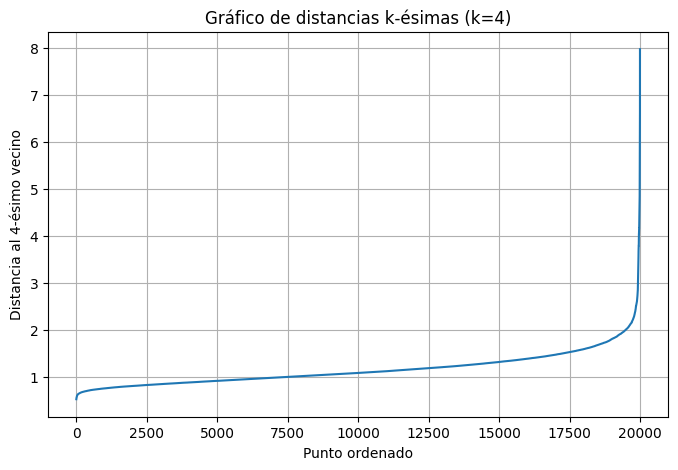

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

k = 4
X_arr = X_scaled.values if hasattr(X_scaled, "values") else np.asarray(X_scaled)

nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_arr)

dists, _ = nn.kneighbors(X_arr)

kth = np.sort(dists[:, -1])

plt.figure(figsize=(8,5))
plt.plot(kth)
plt.title(f'Gráfico de distancias k-ésimas (k={k})')
plt.xlabel('Punto ordenado')
plt.ylabel(f'Distancia al {k}-ésimo vecino')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

Xm, ym = make_moons(n_samples=600, noise=0.05, random_state=42)

def eval_metrics(X, labels):
    mask = labels != -1
    if mask.sum() < 3 or len(set(labels[mask])) < 2:
        return np.nan, np.nan, np.nan
    return (
        silhouette_score(X[mask], labels[mask]),
        calinski_harabasz_score(X[mask], labels[mask]),
        davies_bouldin_score(X[mask], labels[mask])
    )

rows = []
for eps_i, ms in [(0.2,3), (0.25,5), (0.3,5), (0.25,8)]:
    lab = DBSCAN(eps=eps_i, min_samples=ms).fit_predict(Xm)
    sil, ch, db = eval_metrics(Xm, lab)
    rows.append(dict(eps=eps_i, min_samples=ms,
                     clusters=len(set(lab))- (1 if -1 in lab else 0),
                     ruido=(lab==-1).mean(),
                     silhouette=sil, ch=ch, db=db))
pd.DataFrame(rows).sort_values('silhouette', ascending=False)

,eps,min_samples,clusters,ruido,silhouette,ch,db
0,0.20,3,2,0.0,0.332059,393.041441,1.159813
1,0.25,5,1,0.0,NaN,NaN,NaN
2,0.30,5,1,0.0,NaN,NaN,NaN
3,0.25,8,1,0.0,NaN,NaN,NaN


In [ ]:
eps_grid = np.round(np.arange(0.18, 0.30, 0.01), 4)
ms_grid  = [4,5,6]

rows = []
for e in eps_grid:
    for ms in ms_grid:
        lab = DBSCAN(eps=e, min_samples=ms).fit_predict(Xm)
        mask = lab != -1
        ncl = len(set(lab)) - (1 if -1 in lab else 0)
        ruido = (lab == -1).mean()
        if mask.sum() >= 3 and ncl >= 2:
            sil = silhouette_score(Xm[mask], lab[mask])
        else:
            sil = np.nan
        rows.append(dict(eps=e, min_samples=ms, clusters=ncl, ruido=ruido, silhouette=sil))
pd.DataFrame(rows).sort_values(["silhouette","ruido"], ascending=[False, True]).head(10)

,eps,min_samples,clusters,ruido,silhouette
0,0.18,4,2,0.0,0.332059
1,0.18,5,2,0.0,0.332059
2,0.18,6,2,0.0,0.332059
3,0.19,4,2,0.0,0.332059
4,0.19,5,2,0.0,0.332059
5,0.19,6,2,0.0,0.332059
6,0.20,4,2,0.0,0.332059
7,0.20,5,2,0.0,0.332059
8,0.20,6,2,0.0,0.332059
9,0.21,4,2,0.0,0.332059


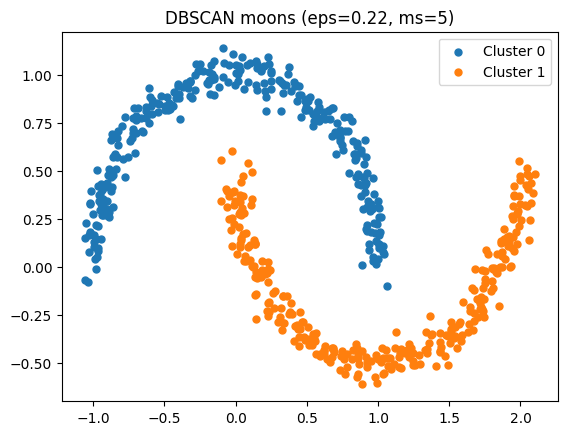

In [ ]:
best = (0.22, 5)
lab = DBSCAN(eps=best[0], min_samples=best[1]).fit_predict(Xm)

plt.figure()
for cid in sorted(set(lab)):
    idx = np.where(lab==cid)[0]
    plt.scatter(Xm[idx,0], Xm[idx,1], label=f"Cluster {cid}", s=25)
plt.legend(); plt.title(f"DBSCAN moons (eps={best[0]}, ms={best[1]})")
plt.show()